In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the CSV is in the same folder as the notebook)
data = pd.read_csv('P1_Composite.csv')


In [3]:
# Identify columns with all zero values
zero_columns = data.columns[(data == 0).all()]

# Print the names of columns with all zero values
print("Columns with all zero values:")
for column in zero_columns:
    print(column)

# Remove columns with all zero values
data_no_zeros = data.drop(columns=zero_columns)


Columns with all zero values:
Pelvis_x
Pelvis_y
Pelvis_z
RMS_Pelvis_xy
RMS_Pelvis_yz
RMS_Pelvis_zx
RMS_Pelvis_xyz
Roll_Pelvis
Pitch_Pelvis


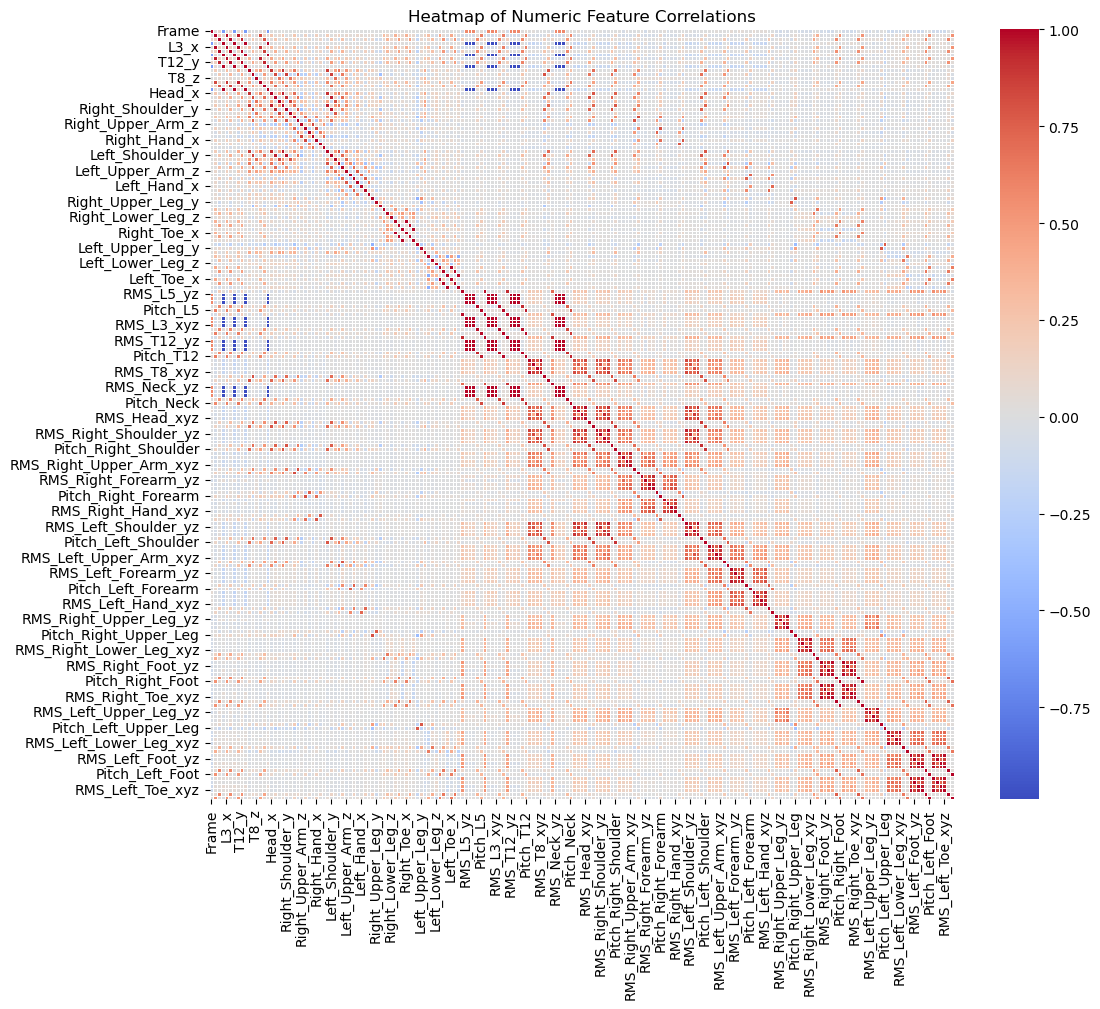

In [14]:
# Select only the numeric columns for correlation analysis
numeric_data = data_no_zeros.select_dtypes(include=[np.number])

# Plot a heatmap of the correlations to visually inspect redundant columns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numeric Feature Correlations')
plt.show()


In [17]:
# Set a threshold for the correlation to define "redundant"
correlation_matrix = numeric_data.corr().abs()

# Select upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Drop columns with high correlation (e.g., > 0.95)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

# Print the names of columns being dropped due to high correlation
print("\nColumns to be dropped due to high correlation (> 0.95):")
for column in to_drop:
    print(column)

# Drop the redundant numeric columns from the numeric subset
numeric_data_reduced = numeric_data.drop(columns=to_drop)

# Recombine the reduced numeric columns with the original non-numeric columns
non_numeric_data = data_no_zeros.select_dtypes(exclude=[np.number])
data_reduced = pd.concat([numeric_data_reduced, non_numeric_data], axis=1)

# Optional: Display the reduced data
print(data_reduced.head())



Columns to be dropped due to high correlation (> 0.95):
L3_x
L3_y
L3_z
T12_x
T12_y
T12_z
Neck_z
Left_Shoulder_x
Left_Shoulder_y
Right_Toe_x
Right_Toe_y
Right_Toe_z
Left_Toe_x
Left_Toe_y
Left_Toe_z
RMS_L5_yz
RMS_L5_zx
RMS_L5_xyz
RMS_L3_xy
RMS_L3_yz
RMS_L3_zx
RMS_L3_xyz
Roll_L3
Pitch_L3
RMS_T12_xy
RMS_T12_yz
RMS_T12_zx
RMS_T12_xyz
Roll_T12
Pitch_T12
RMS_T8_xyz
RMS_Neck_yz
RMS_Neck_zx
RMS_Neck_xyz
RMS_Head_xyz
RMS_Right_Shoulder_xyz
RMS_Right_Forearm_xyz
RMS_Left_Shoulder_xy
RMS_Left_Shoulder_xyz
RMS_Left_Upper_Arm_xyz
RMS_Left_Forearm_xyz
RMS_Right_Upper_Leg_xyz
RMS_Right_Lower_Leg_xyz
RMS_Right_Foot_xyz
RMS_Right_Toe_xy
RMS_Right_Toe_yz
RMS_Right_Toe_zx
RMS_Right_Toe_xyz
Roll_Right_Toe
Pitch_Right_Toe
RMS_Left_Upper_Leg_xyz
RMS_Left_Lower_Leg_xyz
RMS_Left_Foot_xyz
RMS_Left_Toe_xy
RMS_Left_Toe_yz
RMS_Left_Toe_zx
RMS_Left_Toe_xyz
Roll_Left_Toe
Pitch_Left_Toe
   Frame      L5_x      L5_y      L5_z      T8_x      T8_y      T8_z  \
0      0  0.016263 -0.095142  0.221275 -0.000439 -0.090732 

In [19]:
# Save the final reduced dataset into a new CSV file
data_reduced.to_csv('P1_Composite_reduced.csv', index=False)

# Confirming the file save location
print("Dataset saved as 'P1_Composite_reduced.csv'")


Dataset saved as 'P1_Composite_reduced.csv'


In [3]:
# Load the dataset
import pandas as pd

# Load the dataset (replace with your correct file path if needed)
data = pd.read_csv('P1_Composite_reduced.csv')

# Print the list of all column names
print("Column names in the dataset:")
print(list(data.columns))


Column names in the dataset:
['Frame', 'L5_x', 'L5_y', 'L5_z', 'T8_x', 'T8_y', 'T8_z', 'Neck_x', 'Neck_y', 'Head_x', 'Head_y', 'Head_z', 'Right_Shoulder_x', 'Right_Shoulder_y', 'Right_Shoulder_z', 'Right_Upper_Arm_x', 'Right_Upper_Arm_y', 'Right_Upper_Arm_z', 'Right_Forearm_x', 'Right_Forearm_y', 'Right_Forearm_z', 'Right_Hand_x', 'Right_Hand_y', 'Right_Hand_z', 'Left_Shoulder_z', 'Left_Upper_Arm_x', 'Left_Upper_Arm_y', 'Left_Upper_Arm_z', 'Left_Forearm_x', 'Left_Forearm_y', 'Left_Forearm_z', 'Left_Hand_x', 'Left_Hand_y', 'Left_Hand_z', 'Right_Upper_Leg_x', 'Right_Upper_Leg_y', 'Right_Upper_Leg_z', 'Right_Lower_Leg_x', 'Right_Lower_Leg_y', 'Right_Lower_Leg_z', 'Right_Foot_x', 'Right_Foot_y', 'Right_Foot_z', 'Left_Upper_Leg_x', 'Left_Upper_Leg_y', 'Left_Upper_Leg_z', 'Left_Lower_Leg_x', 'Left_Lower_Leg_y', 'Left_Lower_Leg_z', 'Left_Foot_x', 'Left_Foot_y', 'Left_Foot_z', 'RMS_L5_xy', 'Roll_L5', 'Pitch_L5', 'RMS_T8_xy', 'RMS_T8_yz', 'RMS_T8_zx', 'Roll_T8', 'Pitch_T8', 'RMS_Neck_xy', 'Roll

In [5]:
# Check if duplicated columns are identical to the original ones
print("Checking for duplicates:")
print(data[['Action_Type', 'Action_Type.1']].head())
print(data[['Activity_Type', 'Activity_Type.1']].head())
print(data[['Knife_Sharpness', 'Knife_Sharpness.1']].head())

# If they are identical, drop the duplicate columns
data_cleaned = data.drop(columns=['Action_Type.1', 'Activity_Type.1', 'Knife_Sharpness.1'])

# Optional: Verify the remaining columns
print("\nRemaining columns after cleaning:")
print(list(data_cleaned.columns))


Checking for duplicates:
   Action_Type Action_Type.1
0  4 - Cutting   4 - Cutting
1  4 - Cutting   4 - Cutting
2  4 - Cutting   4 - Cutting
3  4 - Cutting   4 - Cutting
4  4 - Cutting   4 - Cutting
  Activity_Type Activity_Type.1
0        Boning          Boning
1        Boning          Boning
2        Boning          Boning
3        Boning          Boning
4        Boning          Boning
  Knife_Sharpness Knife_Sharpness.1
0           Blunt             Blunt
1           Blunt             Blunt
2           Blunt             Blunt
3           Blunt             Blunt
4           Blunt             Blunt

Remaining columns after cleaning:
['Frame', 'L5_x', 'L5_y', 'L5_z', 'T8_x', 'T8_y', 'T8_z', 'Neck_x', 'Neck_y', 'Head_x', 'Head_y', 'Head_z', 'Right_Shoulder_x', 'Right_Shoulder_y', 'Right_Shoulder_z', 'Right_Upper_Arm_x', 'Right_Upper_Arm_y', 'Right_Upper_Arm_z', 'Right_Forearm_x', 'Right_Forearm_y', 'Right_Forearm_z', 'Right_Hand_x', 'Right_Hand_y', 'Right_Hand_z', 'Left_Shoulder_z', 'Le

In [17]:
# Map Knife_Sharpness to numeric values
sharpness_mapping = {'Blunt': 0, 'Medium': 1, 'Sharp': 2}
data_cleaned['Knife_Sharpness_Numeric'] = data_cleaned['Knife_Sharpness'].map(sharpness_mapping)


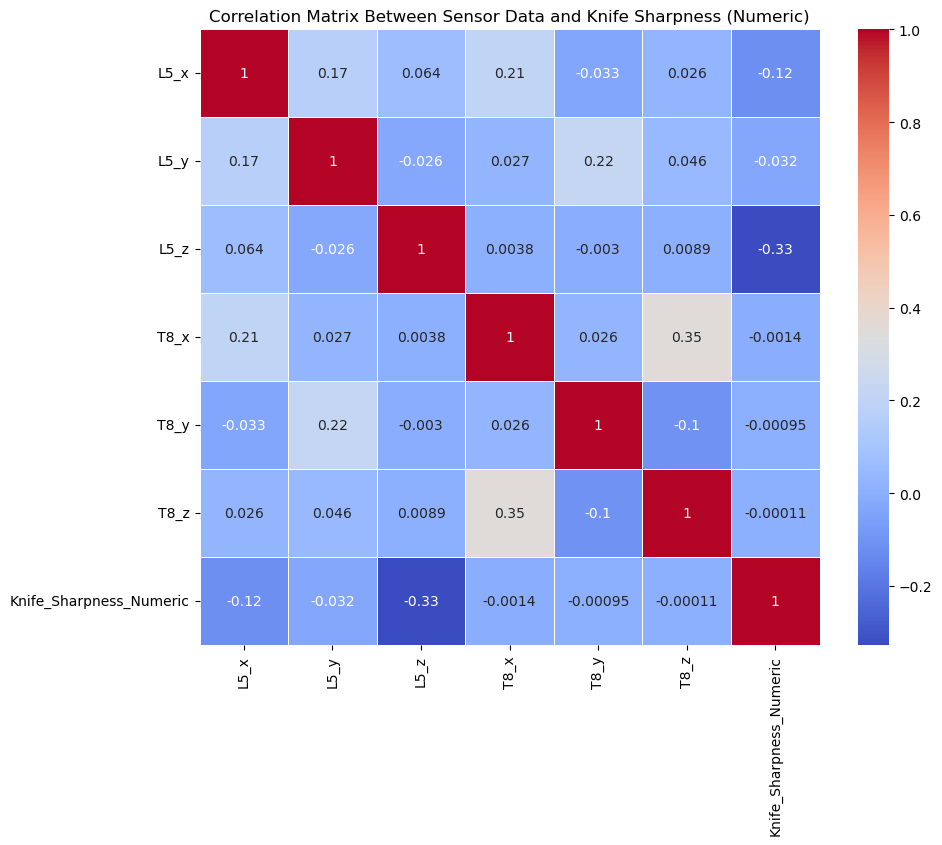

In [19]:
# Select columns related to motion (velocity, acceleration) and the numeric knife sharpness
motion_columns = ['L5_x', 'L5_y', 'L5_z', 'T8_x', 'T8_y', 'T8_z', 'Knife_Sharpness_Numeric']

# Calculate the correlation matrix
correlation_matrix = data_cleaned[motion_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Sensor Data and Knife Sharpness (Numeric)')
plt.show()


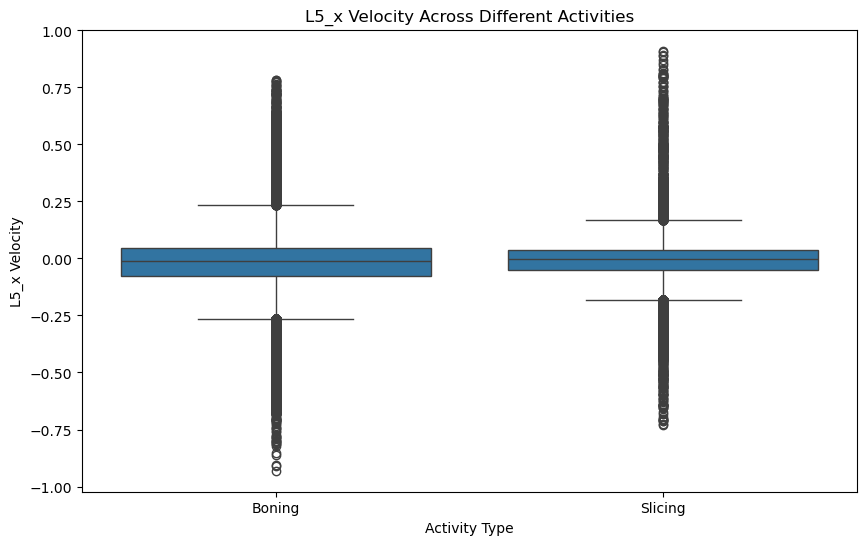

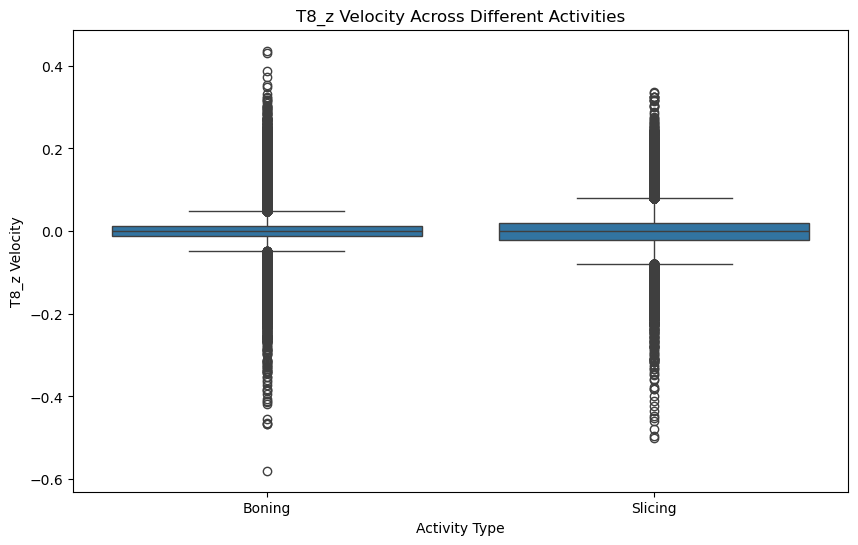

In [27]:
# Boxplot of L5_x velocity across different activities
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity_Type', y='L5_x', data=data_cleaned)
plt.title('L5_x Velocity Across Different Activities')
plt.xlabel('Activity Type')
plt.ylabel('L5_x Velocity')
plt.show()

# Boxplot of T8_z velocity across different activities
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity_Type', y='T8_z', data=data_cleaned)
plt.title('T8_z Velocity Across Different Activities')
plt.xlabel('Activity Type')
plt.ylabel('T8_z Velocity')
plt.show()


C:\Users\tremo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


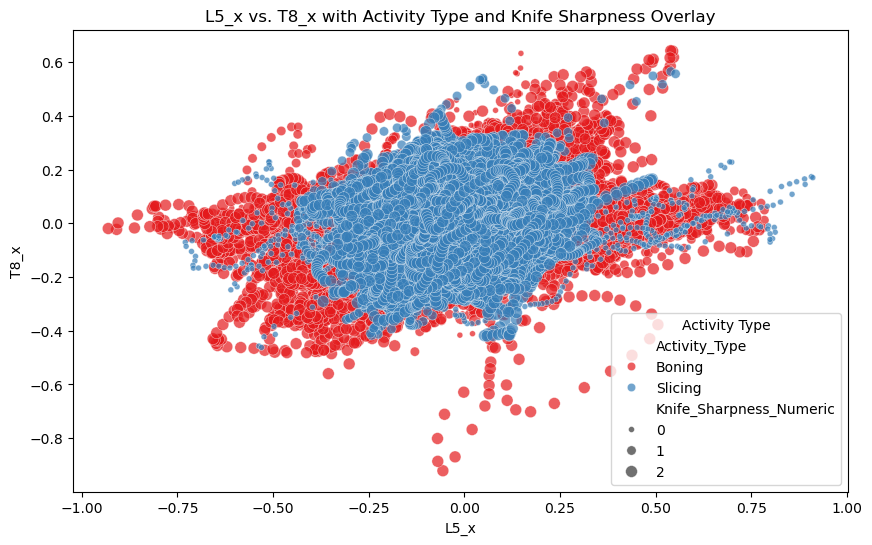

In [29]:

# Scatter plot between L5_x and T8_x, color-coded by Activity_Type and with Knife_Sharpness as a size dimension
plt.figure(figsize=(10, 6))
sns.scatterplot(x='L5_x', y='T8_x', hue='Activity_Type', size='Knife_Sharpness_Numeric', data=data_cleaned, palette='Set1', alpha=0.7)
plt.title('L5_x vs. T8_x with Activity Type and Knife Sharpness Overlay')
plt.xlabel('L5_x')
plt.ylabel('T8_x')
plt.legend(title='Activity Type')
plt.show()


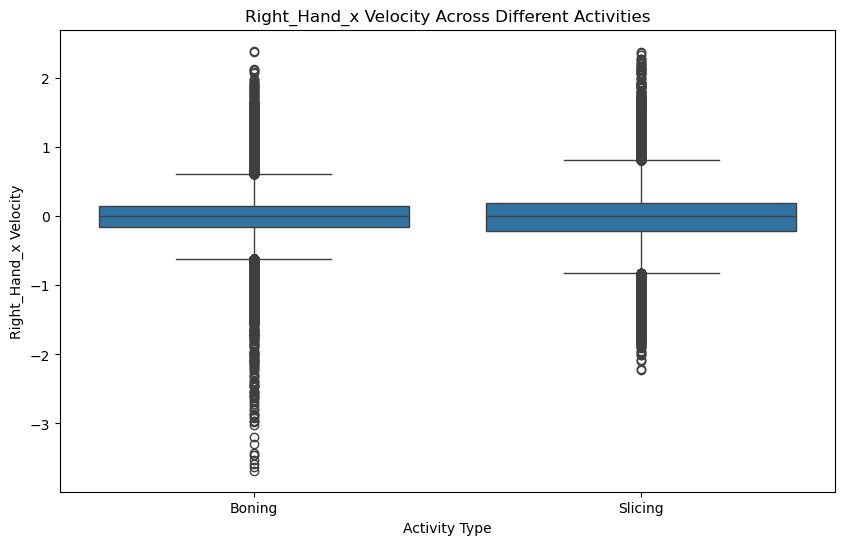

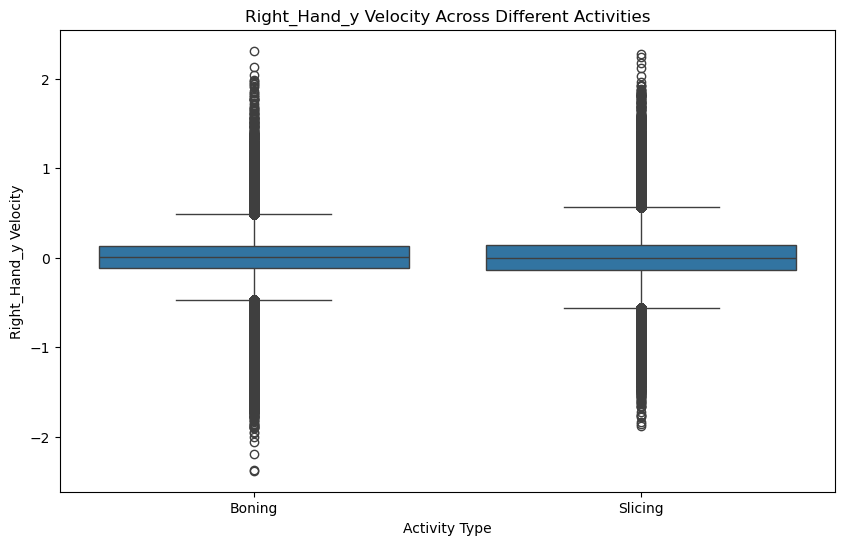

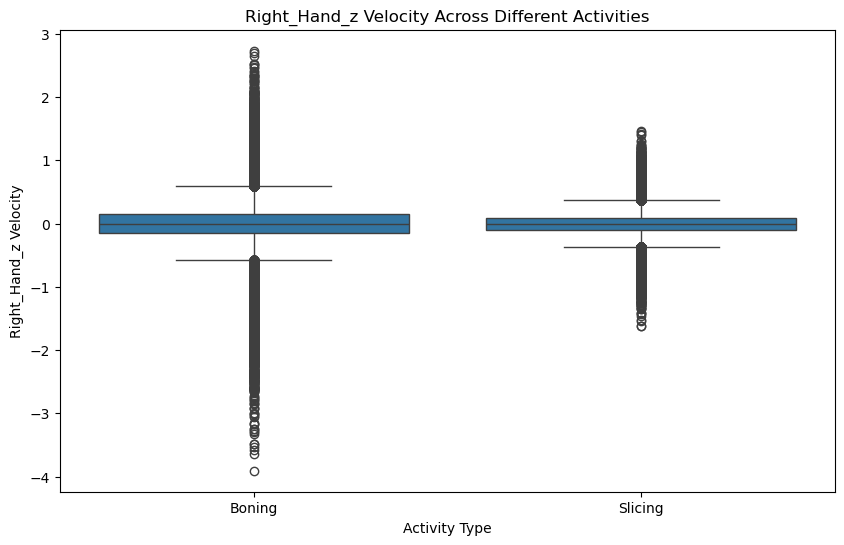

In [31]:
# Boxplot for Right Hand movements across activities
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity_Type', y='Right_Hand_x', data=data_cleaned)
plt.title('Right_Hand_x Velocity Across Different Activities')
plt.xlabel('Activity Type')
plt.ylabel('Right_Hand_x Velocity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity_Type', y='Right_Hand_y', data=data_cleaned)
plt.title('Right_Hand_y Velocity Across Different Activities')
plt.xlabel('Activity Type')
plt.ylabel('Right_Hand_y Velocity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity_Type', y='Right_Hand_z', data=data_cleaned)
plt.title('Right_Hand_z Velocity Across Different Activities')
plt.xlabel('Activity Type')
plt.ylabel('Right_Hand_z Velocity')
plt.show()


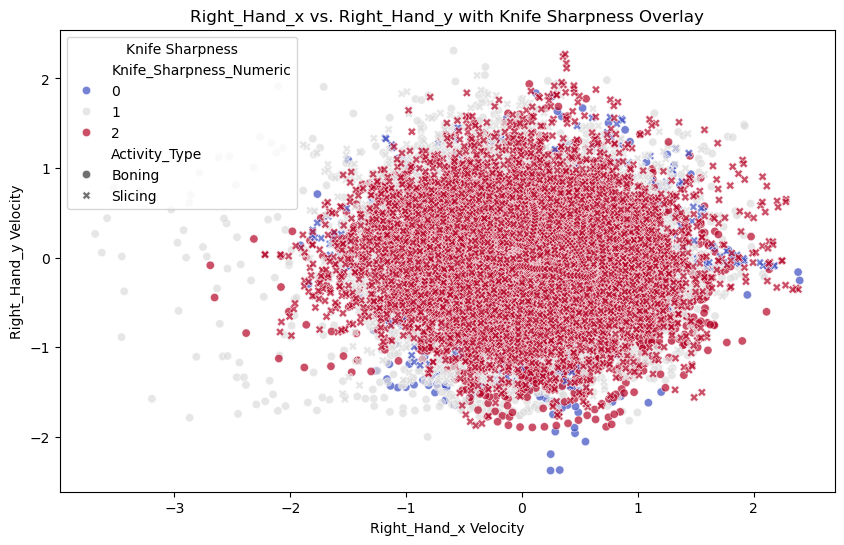

C:\Users\tremo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


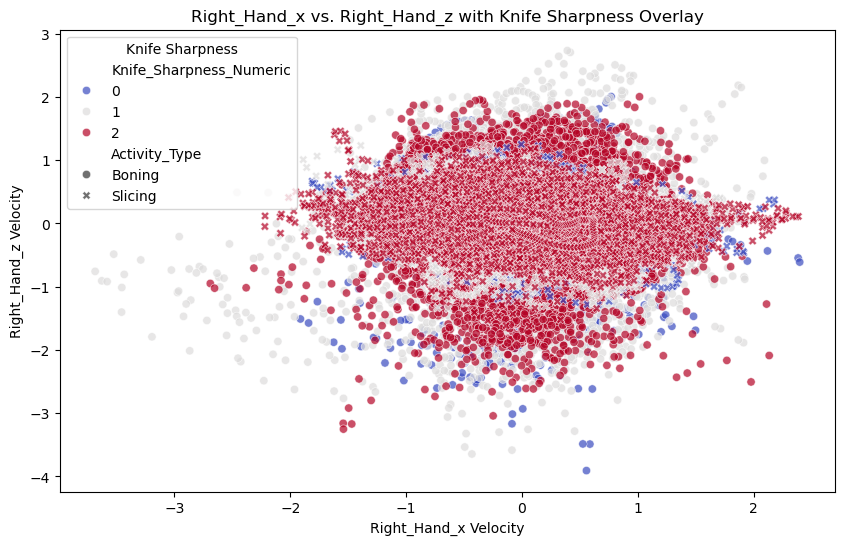

C:\Users\tremo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


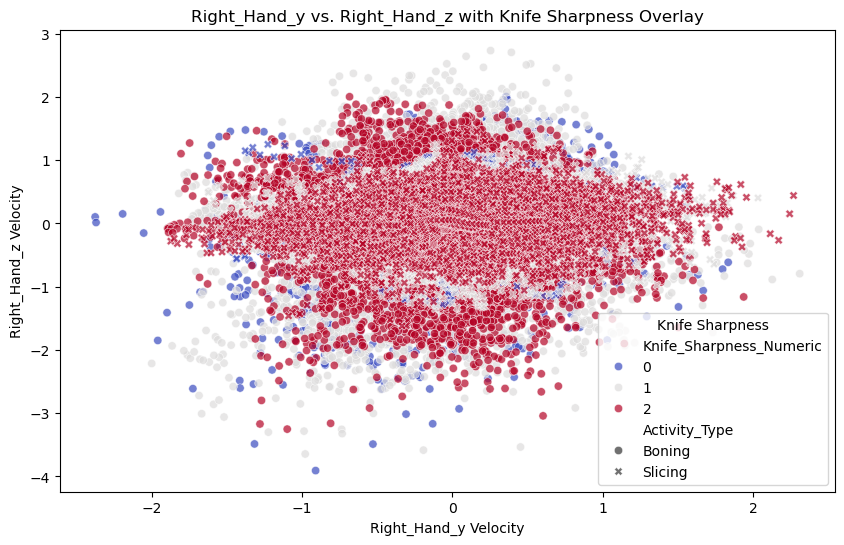

In [33]:
# Scatter plot of Right_Hand_x vs. Right_Hand_y with Knife Sharpness as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Right_Hand_x', y='Right_Hand_y', hue='Knife_Sharpness_Numeric', style='Activity_Type', data=data_cleaned, palette='coolwarm', alpha=0.7)
plt.title('Right_Hand_x vs. Right_Hand_y with Knife Sharpness Overlay')
plt.xlabel('Right_Hand_x Velocity')
plt.ylabel('Right_Hand_y Velocity')
plt.legend(title='Knife Sharpness')
plt.show()

# Scatter plot of Right_Hand_x vs. Right_Hand_z with Knife Sharpness as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Right_Hand_x', y='Right_Hand_z', hue='Knife_Sharpness_Numeric', style='Activity_Type', data=data_cleaned, palette='coolwarm', alpha=0.7)
plt.title('Right_Hand_x vs. Right_Hand_z with Knife Sharpness Overlay')
plt.xlabel('Right_Hand_x Velocity')
plt.ylabel('Right_Hand_z Velocity')
plt.legend(title='Knife Sharpness')
plt.show()

# Scatter plot of Right_Hand_y vs. Right_Hand_z with Knife Sharpness as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Right_Hand_y', y='Right_Hand_z', hue='Knife_Sharpness_Numeric', style='Activity_Type', data=data_cleaned, palette='coolwarm', alpha=0.7)
plt.title('Right_Hand_y vs. Right_Hand_z with Knife Sharpness Overlay')
plt.xlabel('Right_Hand_y Velocity')
plt.ylabel('Right_Hand_z Velocity')
plt.legend(title='Knife Sharpness')
plt.show()


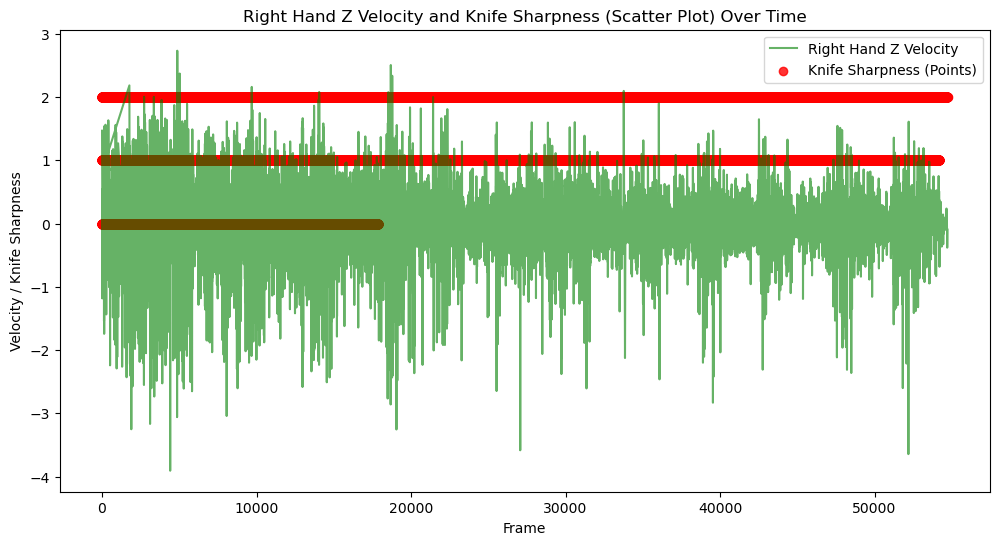

In [47]:
# Scatter plot for Knife Sharpness without interpolation
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Frame'], data_cleaned['Right_Hand_z'], label='Right Hand Z Velocity', color='green', alpha=0.6)
plt.scatter(data_cleaned['Frame'], data_cleaned['Knife_Sharpness_Numeric'], label='Knife Sharpness (Points)', color='red', alpha=0.8)
plt.title('Right Hand Z Velocity and Knife Sharpness (Scatter Plot) Over Time')
plt.xlabel('Frame')
plt.ylabel('Velocity / Knife Sharpness')
plt.legend()
plt.show()


In [50]:
# Split the data based on Activity_Type
boning_data = data_cleaned[data_cleaned['Activity_Type'] == 'Boning']
slicing_data = data_cleaned[data_cleaned['Activity_Type'] == 'Slicing']


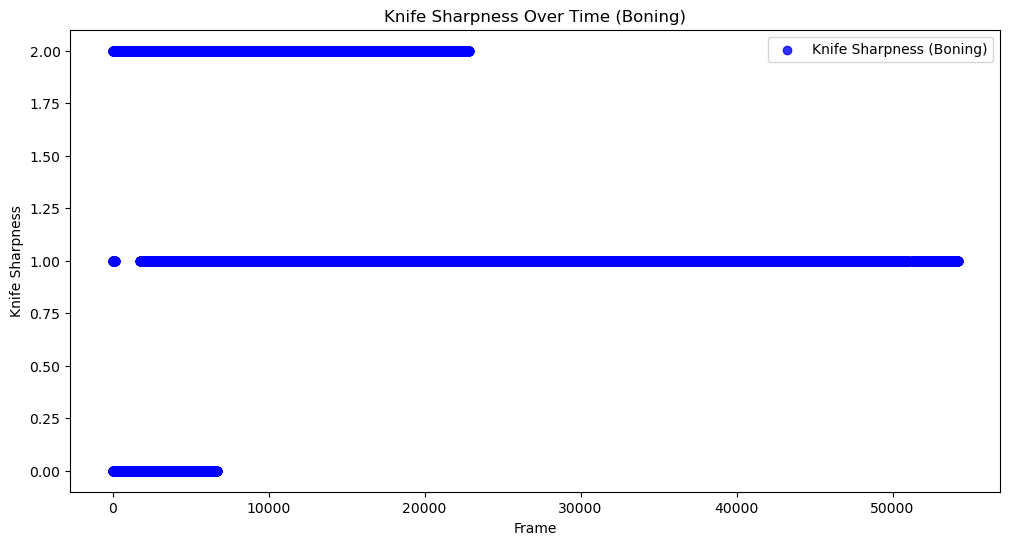

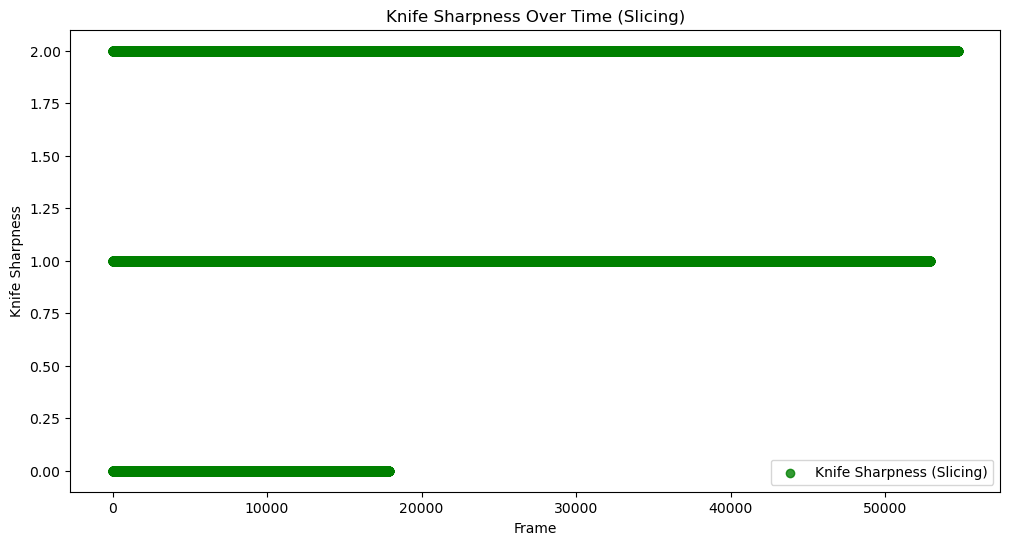

In [51]:
# Plot knife sharpness for boning
plt.figure(figsize=(12, 6))
plt.scatter(boning_data['Frame'], boning_data['Knife_Sharpness_Numeric'], label='Knife Sharpness (Boning)', color='blue', alpha=0.8)
plt.title('Knife Sharpness Over Time (Boning)')
plt.xlabel('Frame')
plt.ylabel('Knife Sharpness')
plt.legend()
plt.show()

# Plot knife sharpness for slicing
plt.figure(figsize=(12, 6))
plt.scatter(slicing_data['Frame'], slicing_data['Knife_Sharpness_Numeric'], label='Knife Sharpness (Slicing)', color='green', alpha=0.8)
plt.title('Knife Sharpness Over Time (Slicing)')
plt.xlabel('Frame')
plt.ylabel('Knife Sharpness')
plt.legend()
plt.show()


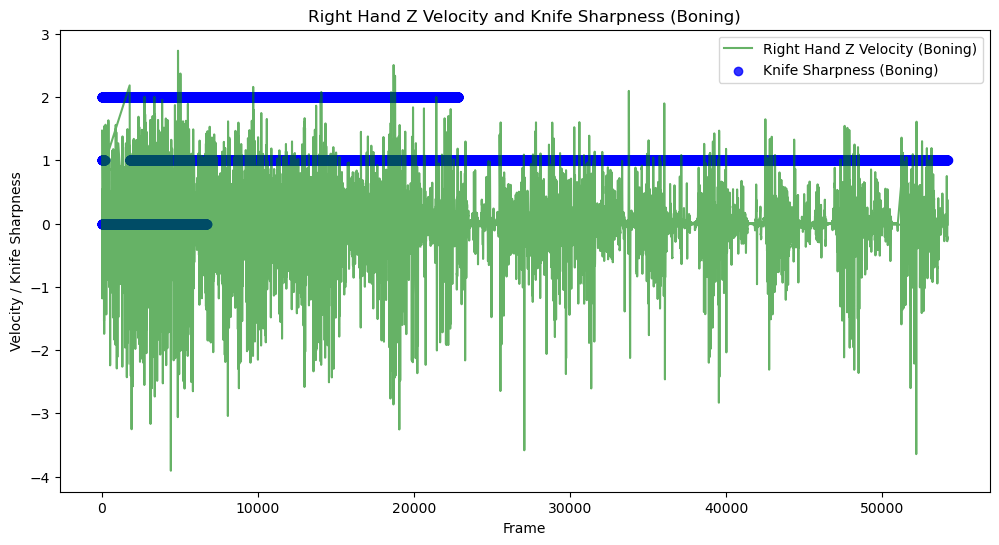

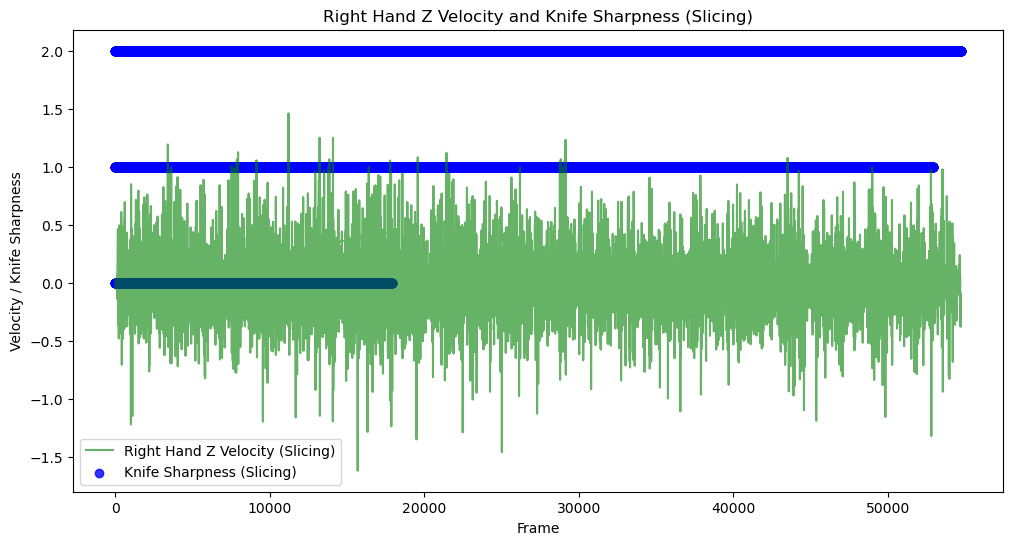

In [54]:
# Plot hand velocity and knife sharpness for boning
plt.figure(figsize=(12, 6))
plt.plot(boning_data['Frame'], boning_data['Right_Hand_z'], label='Right Hand Z Velocity (Boning)', color='green', alpha=0.6)
plt.scatter(boning_data['Frame'], boning_data['Knife_Sharpness_Numeric'], label='Knife Sharpness (Boning)', color='blue', alpha=0.8)
plt.title('Right Hand Z Velocity and Knife Sharpness (Boning)')
plt.xlabel('Frame')
plt.ylabel('Velocity / Knife Sharpness')
plt.legend()
plt.show()

# Plot hand velocity and knife sharpness for slicing
plt.figure(figsize=(12, 6))
plt.plot(slicing_data['Frame'], slicing_data['Right_Hand_z'], label='Right Hand Z Velocity (Slicing)', color='green', alpha=0.6)
plt.scatter(slicing_data['Frame'], slicing_data['Knife_Sharpness_Numeric'], label='Knife Sharpness (Slicing)', color='blue', alpha=0.8)
plt.title('Right Hand Z Velocity and Knife Sharpness (Slicing)')
plt.xlabel('Frame')
plt.ylabel('Velocity / Knife Sharpness')
plt.legend()
plt.show()
